MATH 317 Lab Assignment 3  
Nov 9, 2023  
Thomas Cole, 260904382  

In [2]:
import pandas as pd
import numpy as np
import math as math
import matplotlib.pyplot as plt

### **Q1**)

**Divided Differences Calculation**

In [3]:
def divided_difference(nodes,f):

    # get degree
    n = len(nodes)

    # calculate the function value at each node.
    f_nodes = [f(x) for x in nodes]

    # intialize divided difference array
    dd = np.zeros([n,n])

    # set first col to y-values
    dd[:,0] = f_nodes

    # iteratively calculate divided differences
    for j in range(1,n):
        for i in range(n-j):
            dd[i][j] = (dd[i+1][j-1] - dd[i][j-1])/(nodes[i+j]-nodes[i])

    return dd

Example

In [4]:
nodes = [0,1]
dd = divided_difference(nodes,math.exp)
print(dd)

[[1.         1.71828183]
 [2.71828183 0.        ]]


Above we can see the calculated divided differences table for interpolating the exponential function on [0,1] with 2 nodes. These are exactly the coefficients we calculated in class. We can then use the first row of this table to compute our function at any required value.

**Newton Interpolation**

In [5]:
def newton_interpolation(dd,nodes,x_int):
    # degree -1
    n = len(nodes) - 1
    
    # find need divided differences in dd matrix.
    prod = dd[n]
    
    # sum product to get value
    for i in range(1,n+1):
        prod = dd[n-i] + (x_int - nodes[n -i])*prod
    
    return prod

**Examples**

Example 1: math.exp

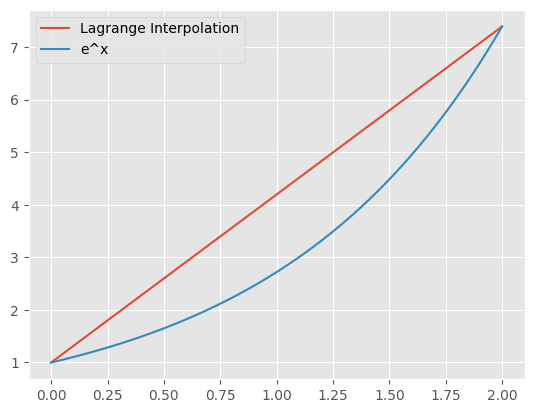

In [6]:
# get nodes
nodes = np.linspace(0,2,2)

# calculate divided differences table, take first row.
dd = divided_difference(nodes,np.exp)[0,]

# get sample values to fill out our plot
sample = np.linspace(0,2,100)
sampled_y = [newton_interpolation(dd,nodes,x) for x in sample]

# actual function
f_x = np.linspace(0,2,1000)
f_y = np.exp(f_x)

# plot both
plt.style.use('ggplot')
plt.plot(sample,sampled_y, label = "Lagrange Interpolation")
plt.plot(f_x,f_y, label = "e^x")
plt.legend()
plt.show()

Example 2: x^3

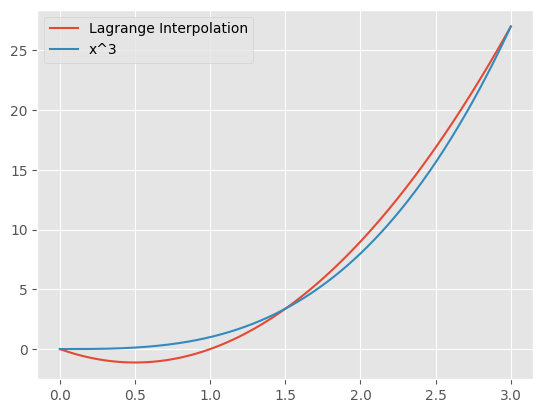

In [7]:
# define new function
def f(x): return x**3

# get nodes
nodes = np.linspace(0,3,3)

# get divided differences
dd = divided_difference(nodes,f)[0,]

# get sample values
sample = np.linspace(0,3,100)
sampled_y = [newton_interpolation(dd,nodes,x) for x in sample]

# actual function
f_x = np.linspace(0,3,1000)
f_y = [f(x) for x in f_x]

# plot function
plt.style.use('ggplot')
plt.plot(sample,sampled_y,label = "Lagrange Interpolation")
plt.plot(f_x,f_y, label = "x^3")
plt.legend()
plt.show()

Example 3: math.sin on [0,2pi]

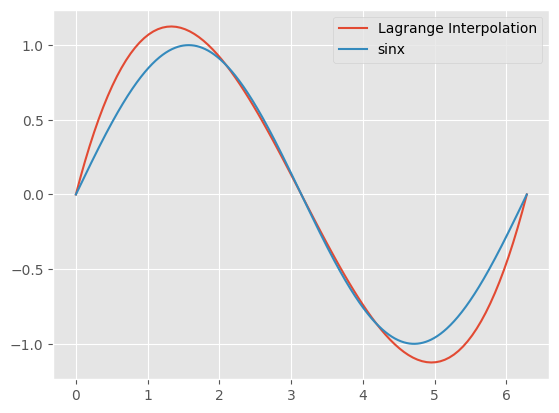

In [8]:
# get nodes
nodes = np.linspace(0,2*math.pi,4)

# get divided differences
dd = divided_difference(nodes,math.sin)[0,]

# get sample values
sample = np.linspace(0,2*math.pi,100)
sampled_y = [newton_interpolation(dd,nodes,x) for x in sample]

# actual function
f_x = np.linspace(0,2*math.pi,1000)
f_y = [math.sin(x) for x in f_x]

# plot function
plt.style.use('ggplot')
plt.plot(sample,sampled_y, label = "Lagrange Interpolation")
plt.plot(f_x,f_y, label = "sinx")
plt.legend()
plt.show()

Above we can see the graphs of a few common functions, which illustrate the performance of lagrange interpolation for varying degrees and number of nodes. We can also visually see the difference in error for some of these plots.

### **Q2**) Maximum Error of Interpolation

In [9]:
def max_error(int_start,int_end,n_degree,func,method = "equal",int_method = "lagrange"):

    # get interpolation nodes
    nodes = np.linspace(int_start,int_end,n_degree)

    # change node calculations if we want chebyshev 
    if method == "chebyshev":
        nodes = chebyshev(int_start,int_end,n_degree)
        
    
    # get divided difference
    dd = divided_difference(nodes,func)[0,]
    

    # test values
    x_test = np.linspace(int_start,int_end,1000)

    # true function values and interpolated values
    y_true = np.array([func(x) for x in x_test])

    # get values based on interpolating method
    y_int  = np.array([newton_interpolation(dd,nodes,x) for x in x_test])
    if int_method == "pl":
        y_int  = np.array([linear_interpolation(int_start,int_end,n_degree,func,x) for x in x_test])
    elif(int_method == "pq"):
        y_int  = np.array([quadratic_interpolate(int_start,int_end,n_degree,func,x) for x in x_test])
    

    # error
    error = abs(y_true - y_int)
    
    # x value of max error
    index = np.where(error == max(error))
    x_val = x_test[index]
    return max(error),x_val

To compute the maximum error of the lagrange interpolation of f on the interval of choice, we sample 1000 points from each of the functions. We take the absolute difference between these values and find the maximum. My function returns the x_val for which the maximum error occurs and also the maximum error itself.

**Examples**

Example 1: math.exp

In [10]:
m_e, x_val_e = max_error(0,2,2,math.exp)
m_e,float(x_val_e)

(1.515722445217425, 1.1611611611611612)

Here we can see the maximum error occurs at 1.16, and is 1.51.

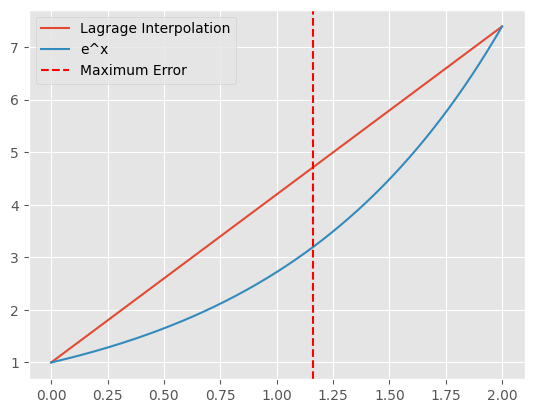

In [11]:
# get nodes
nodes = np.linspace(0,2,2)

# get divided difference
dd = divided_difference(nodes,np.exp)[0,]

# get sample points
sample = np.linspace(0,2,100)
sampled_y = [newton_interpolation(dd,nodes,x) for x in sample]

# actual function
f_x = np.linspace(0,2,1000)
f_y = np.exp(f_x)

# plot both
plt.style.use('ggplot')
plt.plot(sample,sampled_y, label = "Lagrage Interpolation")
plt.plot(f_x,f_y, label = "e^x")
plt.axvline(x_val_e,linestyle='dashed',color = 'r', label = "Maximum Error")
plt.legend()
plt.show()

Example 2: x^3

In [12]:
def f(x): return x**3

In [13]:
m_e, x_val_e = max_error(0,3,3,f)
m_e,float(x_val_e)

(1.299037803596416, 0.6336336336336337)

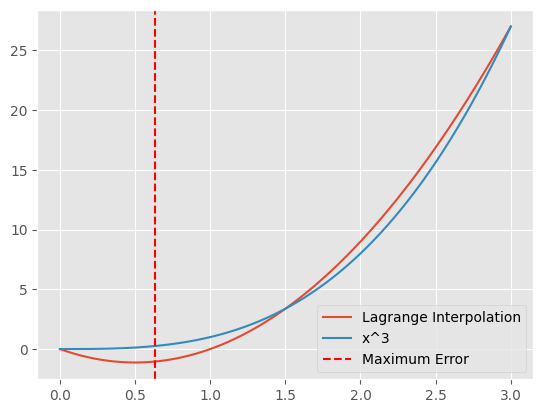

In [14]:
# get nodes
nodes = np.linspace(0,3,3)

# get divided differences
dd = divided_difference(nodes,f)[0,]

# get sample values
sample = np.linspace(0,3,100)
sampled_y = [newton_interpolation(dd,nodes,x) for x in sample]

# actual function
f_x = np.linspace(0,3,1000)
f_y = [f(x) for x in f_x]
m_e, x_val_e = max_error(0,3,3,f)

# plot function
plt.style.use("ggplot")
plt.plot(sample,sampled_y, label = "Lagrange Interpolation")
plt.plot(f_x,f_y, label = "x^3")
plt.axvline(x_val_e,linestyle='dashed',color = 'r', label = "Maximum Error")
plt.legend()
plt.show()

Example 3: math.sin on [0,2pi]

In [15]:
m_e, x_val_e = max_error(0,2*math.pi,4,math.sin)
m_e,float(x_val_e)

(0.2553541021648421, 5.597632555945777)

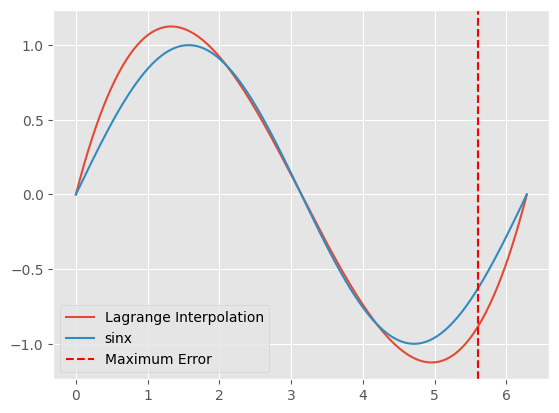

In [16]:
# get nodes
nodes = np.linspace(0,2*math.pi,4)

# get divided differences
dd = divided_difference(nodes,math.sin)[0,]

# get sample values
sample = np.linspace(0,2*math.pi,1000)
sampled_y = [newton_interpolation(dd,nodes,x) for x in sample]

# actual function
f_x = np.linspace(0,2*math.pi,1000)
f_y = [math.sin(x) for x in f_x]

# plot function
plt.style.use("ggplot")
plt.plot(sample,sampled_y, label = "Lagrange Interpolation")
plt.plot(f_x,f_y, label = "sinx")
plt.axvline(x_val_e,linestyle='dashed',color = 'r', label = "Maximum Error")
plt.legend()
plt.show()

The above graphs show the maximum error for the functions that we examined in question 1. Though the region where the maximum error occurs was visible in the first question, we are now able to get a clearer picture of where that is located by sampling values.

### **Q3**)

In [17]:
# start and end interval points
int_start = 0
int_end   =  2*math.pi

# varying degree of interpolation
ns = np.arange(1,100,1)

# get maximum error for each degree
max_errors = [max_error(int_start,int_end,n,math.sin) for n in ns]
max_errors = list(zip(*max_errors))[0]

# calculate log of maximum error
log_me = np.log(max_errors)

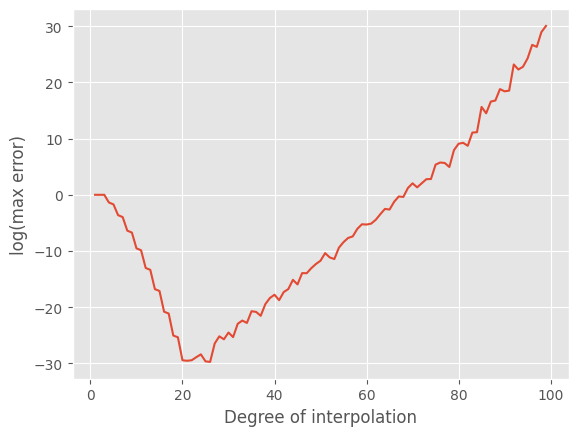

In [18]:
plt.style.use("ggplot")
plt.plot(ns,log_me)
plt.xlabel("Degree of interpolation")
plt.ylabel('log(max error)')
plt.show()

We can see that the log of the maximum error decrease as we increase the degree of the interpolated polynomial until about n = 20. After this point, we see that the maximum error of our interpolated polynomial actually increases, this result is somewhat expected based on the theory that we have seen in lecture, specifically related to equally spaced nodes.

### **Q4**) Runge Phenomenon

In [19]:
def f_runge(x):
    y = 1/(1+25*x**2)
    return y

Regular Interpolation Plot

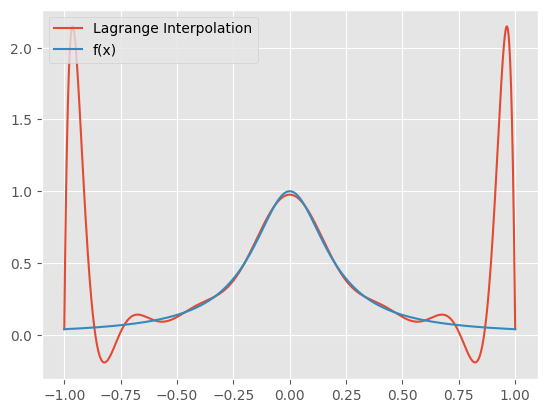

In [20]:
# get nodes
nodes = np.linspace(-1,1,16)

# get divided differences
dd = divided_difference(nodes,f_runge)[0,]

# get samples
sample = np.linspace(-1,1,1000)
sampled_y = [newton_interpolation(dd,nodes,x) for x in sample]

# actual function
f_x = np.linspace(-1,1,1000)
f_y = f_runge(f_x)

# plot
plt.style.use("ggplot")
plt.plot(sample,sampled_y, label = "Lagrange Interpolation")
plt.plot(f_x,f_y, label = "f(x)")
plt.legend(loc = "upper left")
plt.show()

To illustrate the runge phenomenon we use the function f(x) = 1 / 1 + 25x^2, we use this function with 16 equally spaced nodes. This is the common example that was shown when doing reading on the phenomenon. The phenomenon shows the problem of extreme oscillation at end points of an interval under equally spaced nodes. This is evident in the graph.

Log of Maximum Error Plot

In [21]:
# start and end points
int_start = -1
int_end   =  1

# degree 
ns = np.arange(1,100,1)

# get maximum error
max_errors = [max_error(int_start,int_end,n,f_runge) for n in ns]
max_errors = list(zip(*max_errors))[0]

# log maximum error
log_me = np.log(max_errors)

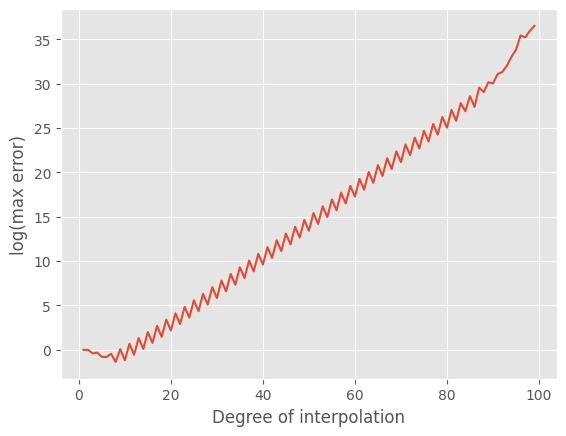

In [22]:
plt.style.use("ggplot")
plt.plot(ns,log_me)
plt.xlabel("Degree of interpolation")
plt.ylabel('log(max error)')
plt.show()

As we can see by the graph above, and the previous graph, the maximum error of our interpolated function grows with increasing degree. This is a result of the oscillations at the boundary points becoming more accentuated due to the equally spaced nodes requirement. 

### **Q5**) Chebyshev

Calculate Chebyshev Nodes

In [23]:
def chebyshev(a, b, n):
    k = np.array(range(n))
    x = np.cos((2 * k + 1) * math.pi / (2 * n))
    nodes = 1/2 * (b - a) * x + (b+a) * 1/2
    return nodes

Here I've created a function to calculate the chebyshev nodes based on a generic interval [a,b] for n nodes.

Plot

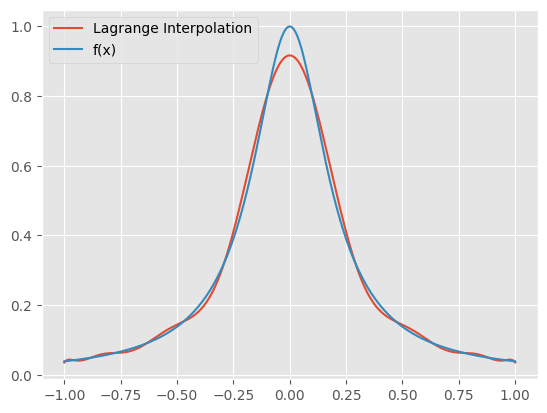

In [24]:
# get nodes
nodes = list(chebyshev(-1,1,16))

# get divided differences
dd = divided_difference(nodes,f_runge)[0,]

# get sample values
sample = np.linspace(-1,1,1000)
sampled_y = [newton_interpolation(dd,nodes,x) for x in sample]

# actual function
f_x = np.linspace(-1,1,1000)
f_y = f_runge(f_x)

# plot function
plt.style.use("ggplot")
plt.plot(sample,sampled_y, label = "Lagrange Interpolation")
plt.plot(f_x,f_y, label = "f(x)")
plt.legend(loc = "upper left")
plt.show()

Visually here, we can see that the interpolation using chebyshev nodes performs much better. This is expected given their purpose.

**Log Maximum Error**

In [25]:
# start and end points
int_start = -1
int_end   =  1

# degree 
ns = np.arange(1,100,1)

# get maximum error
max_errors = [max_error(int_start,int_end,n,f_runge,method = 'chebyshev') for n in ns]
max_errors = list(zip(*max_errors))[0]

# log maximum error
log_me = np.log(max_errors)

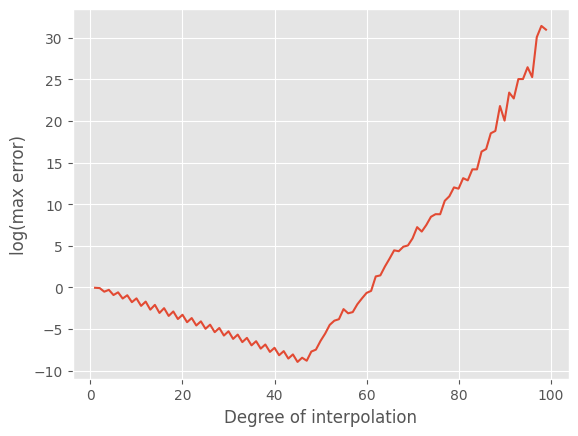

In [26]:
plt.style.use("ggplot")
plt.plot(ns,log_me)
plt.xlabel("Degree of interpolation")
plt.ylabel('log(max error)')
plt.show()

As we expected and know from the theory surrounding Chebyshev nodes, the maximum interpolation error decreases as we increase the degree of our interpolating polynomial. This is guaranteed until some value n. For this interpolation we can see that the maximum error decreases until about n = 45, after which point it increases again.

That said, using Chebyshev nodes certainly performs better than equally spaced nodes when performing interpolation of this function.

### **Q6**) Piecewise Linear Interpolation

In [27]:
def linear_interpolation(int_start,int_end,n_nodes,func,valx,method = "equal"):
    # get nodes
    nodes = np.linspace(int_start,int_end,n_nodes)

    # if chebyshev 
    if method == "chebyshev":
        nodes = chebyshev(int_start,int_end,n_nodes)  
    
    # find interval where x falls.
    for i in range(len(nodes)):
        if valx > nodes[i]:
            continue
        else:
            break
    
    # calculate lagrange coefficients
    l1 = (nodes[i] - valx )/ (nodes[i] - nodes[i-1])
    l2 = (valx - nodes[i-1]) / (nodes[i] - nodes[i-1])
    
    # calculate interpolated y-value.
    y_int = l1*func(nodes[i-1]) + l2*func(nodes[i])

    return y_int

To compute piecewise linear interpolation across the interval [a,b], we need to apply the formulas the we devised for lagrange interpolation. First, we need to find the two points between which our interpolated x-value resides. Then, we can calculate the coefficients and recover the interpolated y-value.

**Examples**

Example 1: e^x

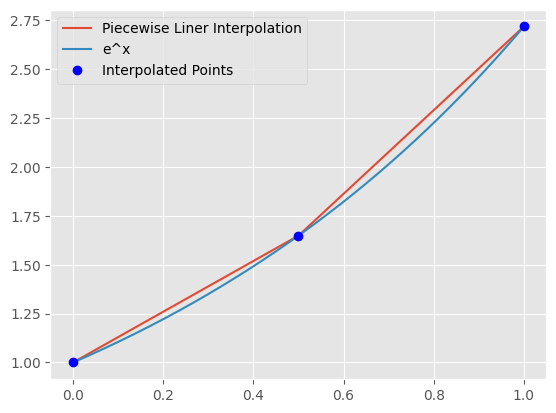

In [28]:
# get x values for nodes
xs = np.linspace(0,1,3)
# get interpolated y values.
ys = [linear_interpolation(0,1,100,math.exp,x) for x in xs]

# get actual function 
xt = np.linspace(0,1,1000)
yt = [math.exp(x) for x in xt]

# plot
plt.style.use("ggplot")
plt.plot(xs,ys, label = "Piecewise Liner Interpolation")
plt.plot(xt,yt, label = "e^x")
plt.plot(xs,ys,'bo', label = "Interpolated Points")
plt.legend()
plt.show()

Example 2: math.sin

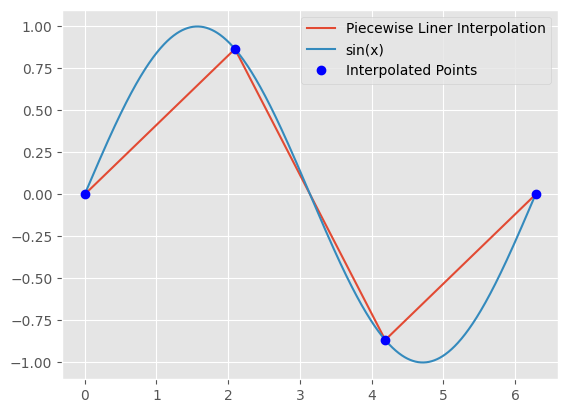

In [47]:
# get x values for nodes
xs = np.linspace(0,2*math.pi,4)

# get interpolated y values.
ys = [linear_interpolation(0,2*math.pi,100,math.sin,x) for x in xs]

# get actual function 
xt = np.linspace(0,2*math.pi,1000)
yt = [math.sin(x) for x in xt]

# plot 
plt.style.use("ggplot")
plt.plot(xs,ys, label = "Piecewise Liner Interpolation")
plt.plot(xt,yt, label = "sin(x)")
plt.plot(xs,ys,'bo', label = "Interpolated Points")
plt.legend()
plt.show()

Example 3: sqrt(x)

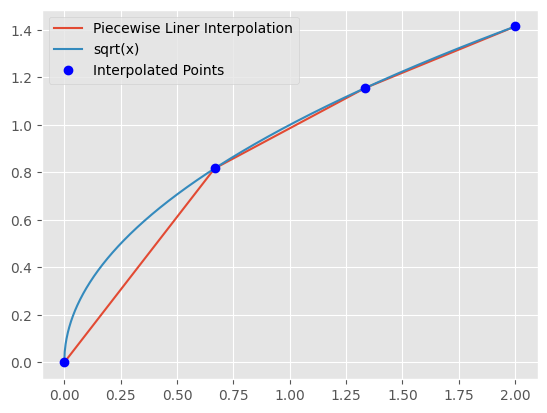

In [30]:
# get x values for nodes
xs = np.linspace(0,2,4)

# get interpolated y values.
ys = [linear_interpolation(0,2,100,math.sqrt,x) for x in xs]

# get actual function 
xt = np.linspace(0,2,1000)
yt = [math.sqrt(x) for x in xt]

# plot 
plt.style.use("ggplot")
plt.plot(xs,ys, label = "Piecewise Liner Interpolation")
plt.plot(xt,yt, label = "sqrt(x)")
plt.plot(xs,ys,'bo', label = "Interpolated Points")
plt.legend()
plt.show()

The above examples illustrate how piecewise linear interpolation performs on a variety of different functions. More specifically we can see that it performs better on some functions than others, and is also subject to the number of nodes selected within the interval of interpolation. 

### **Q7**) Piecewise Quadratic Interpolation

In [31]:
def quadratic_interpolate(int_start,int_end,n_nodes,func,valx,method = "equal"):
    # get nodes
    nodes = np.linspace(int_start,int_end,n_nodes)

    # if chebyshev 
    if method == "chebyshev":
        nodes = chebyshev(int_start,int_end,n_nodes)  
        
    # find interval where x falls.
    for i in range(len(nodes)):
        if valx > nodes[i]:
            continue
        else:
            break

    # control points in the first and last intervals.
    if i == (len(nodes)-1):
        i = len(nodes) - 2
    
    if i == 0:
        i = 1

    # calculate lagrange coefficients
    l0 = ((valx - nodes[i])*(valx - nodes[i+1])) / ((nodes[i-1]-nodes[i])*(nodes[i-1]-nodes[i+1]))
    l1 = ((valx - nodes[i-1])*(valx - nodes[i+1])) / ((nodes[i] - nodes[i-1])*(nodes[i]-nodes[i+1]))
    l2 = ((valx-nodes[i-1])*(valx - nodes[i])) / ((nodes[i+1] - nodes[i-1])*(nodes[i+1]-nodes[i]))

    # calcualted interpolated y-value.
    y_int = func(nodes[i-1])*l0 + func(nodes[i])*l1 + func(nodes[i+1])*l2

    return y_int

As we did with piecewise linear interpolation, we follow the same idea to apply piecewise quadratic interpolation across the interval [a,b]. First we find the points between which our interpolated x-value resides. After this, we can calculate the coefficients and recover the interpolated y-value using the formula.

**Examples**

Example 1: e^x

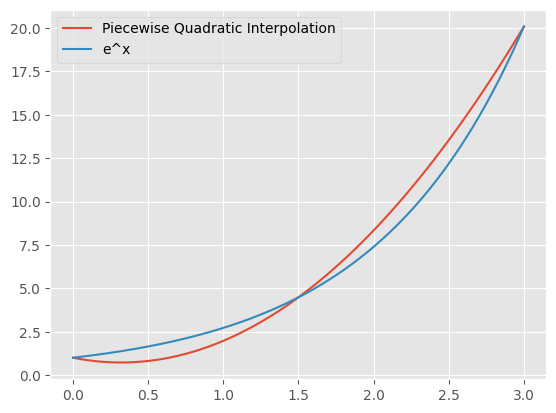

In [32]:
# get x values for nodes
xs = np.linspace(0,3,100)

# get interpolated y values.
ys = [quadratic_interpolate(0,3,3,math.exp,x) for x in xs]

# get actual function 
xt = np.linspace(0,3,1000)
yt = [math.exp(x) for x in xt]

# plot
plt.style.use("ggplot")
plt.plot(xs,ys, label = "Piecewise Quadratic Interpolation")
plt.plot(xt,yt, label = "e^x")
plt.legend()
plt.show()

Example 2: math.sin

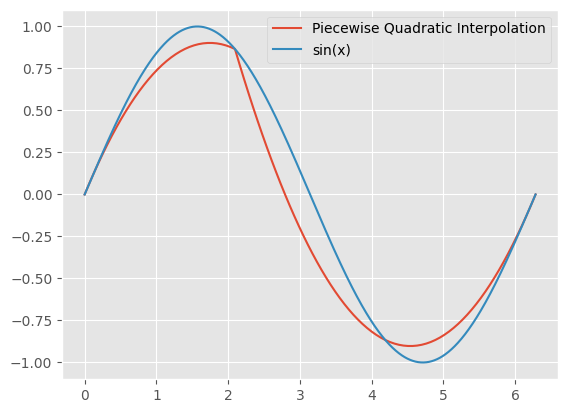

In [33]:
# get x values for nodes
xs = np.linspace(0,2*math.pi,100)

# get interpolated y values.
ys = [quadratic_interpolate(0,2*math.pi,4,math.sin,x) for x in xs]

# get actual function 
xt = np.linspace(0,2*math.pi,1000)
yt = [math.sin(x) for x in xt]

# plot
plt.style.use("ggplot")
plt.plot(xs,ys, label = "Piecewise Quadratic Interpolation")
plt.plot(xt,yt, label = "sin(x)")
plt.legend()
plt.show()

Example 3: sqrt(x)

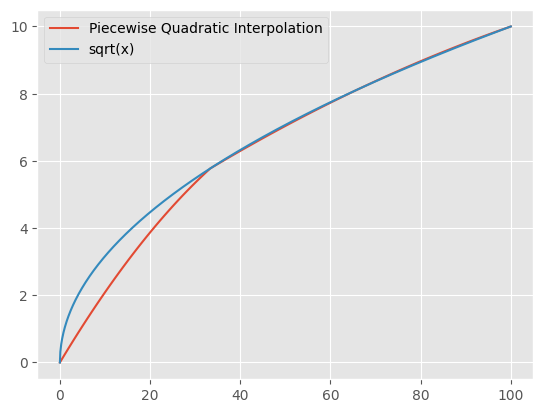

In [34]:
# get x values for nodes
xs = np.linspace(0,100,100)

# get interpolated y values.
ys = [quadratic_interpolate(0,100,4,math.sqrt,x) for x in xs]

# get actual function 
xt = np.linspace(0,100,1000)
yt = [math.sqrt(x) for x in xt]

# plot
plt.style.use("ggplot")
plt.plot(xs,ys, label = "Piecewise Quadratic Interpolation")
plt.plot(xt,yt, label = "sqrt(x)")
plt.legend()
plt.show()

The above examples shows how piecewise quadratic interpolation performs on a variety of different functions. More specifically we can see that it performs better on some functions than others and in cases better than piecewise linear interpolation.  That said, this method is still subject to the number of nodes selected within the interval of interpolation. 

### **Q8.1**) Q3 Piecewise Quadratic and Linear Interpolation with Equally Spaced Nodes

Piecewise Linear Interpolatoin of sin(x) [As seen in Q6]

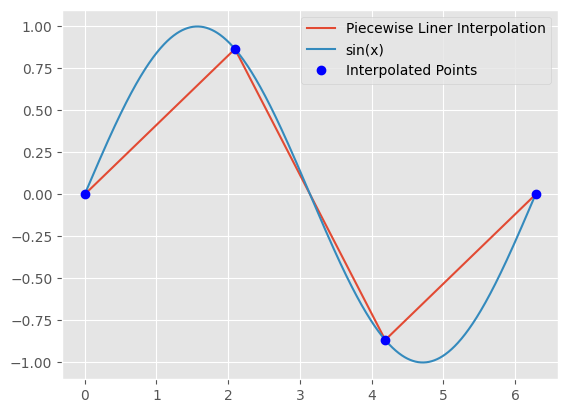

In [48]:
# get x values for nodes
xs = np.linspace(0,2*math.pi,4)

# get interpolated y values.
ys = [linear_interpolation(0,2*math.pi,100,math.sin,x) for x in xs]

# get actual function 
xt = np.linspace(0,2*math.pi,1000)
yt = [math.sin(x) for x in xt]

# plot 
plt.style.use("ggplot")
plt.plot(xs,ys, label = "Piecewise Liner Interpolation")
plt.plot(xt,yt, label = "sin(x)")
plt.plot(xs,ys,'bo', label = "Interpolated Points")
plt.legend()
plt.show()

Maximum Error of Piecewise Linear Interpolation of sin(x)

In [49]:
# start and end interval points
int_start = 0
int_end   =  2*math.pi

# varying degree of interpolation
ns = np.arange(2,100,1)

# get maximum error for each degree
max_errors = [max_error(int_start,int_end,n,math.sin,int_method="pl") for n in ns]
max_errors = list(zip(*max_errors))[0]

# calculate log of maximum error
log_me = np.log(max_errors)

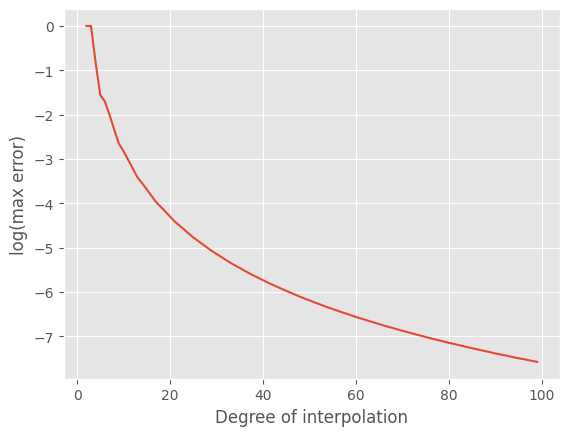

In [50]:
plt.style.use("ggplot")
plt.plot(ns,log_me)
plt.xlabel("Degree of interpolation")
plt.ylabel('log(max error)')
plt.show()

Piecewise Quadratic Interpolation of sin(x) [As in Q7]

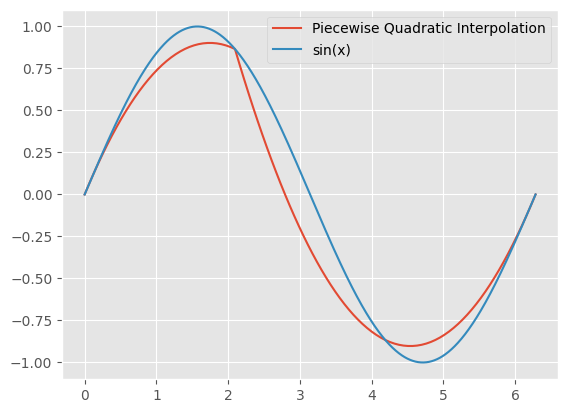

In [51]:
# get x values for nodes
xs = np.linspace(0,2*math.pi,100)

# get interpolated y values.
ys = [quadratic_interpolate(0,2*math.pi,4,math.sin,x) for x in xs]

# get actual function 
xt = np.linspace(0,2*math.pi,1000)
yt = [math.sin(x) for x in xt]

# plot
plt.style.use("ggplot")
plt.plot(xs,ys, label = "Piecewise Quadratic Interpolation")
plt.plot(xt,yt, label = "sin(x)")
plt.legend()
plt.show()

Maximum Error of Piecewise Quadratic Interpolation of sin(x)

In [65]:
# start and end interval points
int_start = 0
int_end   =  2*math.pi

# number of interpolation points
ns = np.arange(3,100,1)

# get maximum error for each degree
max_errors = [max_error(int_start,int_end,n,math.sin,int_method="pq") for n in ns]
max_errors = list(zip(*max_errors))[0]

# calculate log of maximum error
log_me = np.log(max_errors)

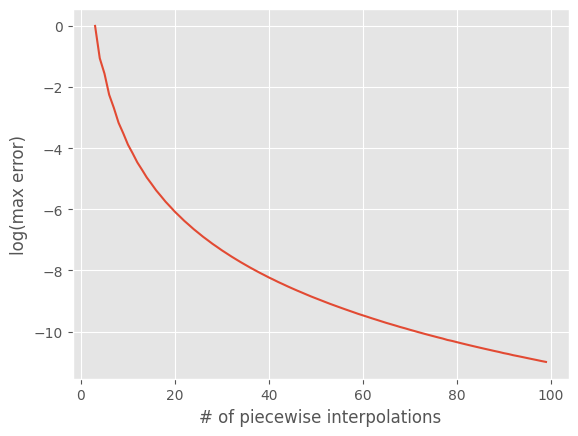

In [66]:
plt.style.use("ggplot")
plt.plot(ns,log_me)
plt.xlabel("# of piecewise interpolations")
plt.ylabel('log(max error)')
plt.show()

As we can see from the graphs, and was expected- when we increase the number of nodes under both piecewise linear and piecewise quadratic interpolation, our maximum error decreases. We might also have expected that the log(max_error) decreases more rapidly with quadratic interpolation vs linear- which appears to be the case in our graphs. Though this method can still be improved, this result is much more desirable in terms of bounding decreasing maximum error when compared to our previously explored interpolations.

### **Q8.2**) Q4 Piecewise Quadratic and Linear Interpolation for Runge Function

Piecewise Linear Interpolation of f_runge

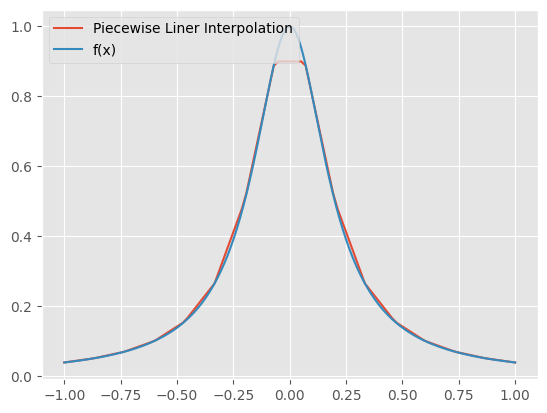

In [67]:
# get x values for nodes
xs = np.linspace(-1,1,100)

# get interpolated y values.
ys = [linear_interpolation(-1,1,16,f_runge,x) for x in xs]

# get actual function 
xt = np.linspace(-1,1,1000)
yt = [f_runge(x) for x in xt]

# plot 
plt.style.use("ggplot")
plt.plot(xs,ys, label = "Piecewise Liner Interpolation")
plt.plot(xt,yt, label = "f(x)")
plt.legend(loc = "upper left")
plt.show()

Maximum Error of Piecewise Linear Interpolation of f_runge

In [68]:
# start and end points
int_start = -1
int_end   =  1

# degree 
ns = np.arange(2,100,1)

# get maximum error
max_errors = [max_error(int_start,int_end,n,f_runge,int_method='pl') for n in ns]
max_errors = list(zip(*max_errors))[0]

# log maximum error
log_me = np.log(max_errors)

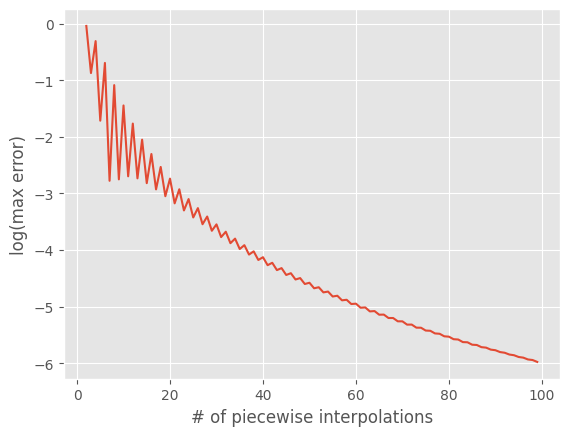

In [69]:
plt.style.use("ggplot")
plt.plot(ns,log_me)
plt.xlabel("# of piecewise interpolations")
plt.ylabel('log(max error)')
plt.show()

Piecewise Quadratic Linear Interpolation of f_runge

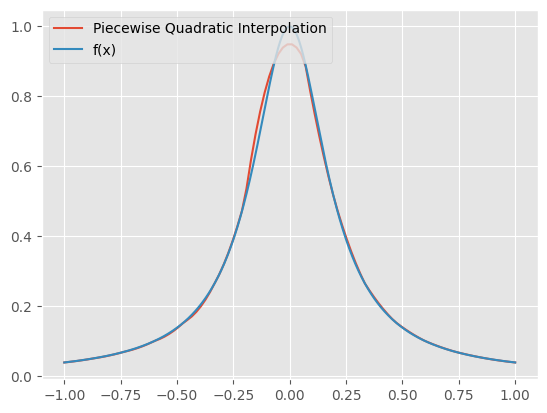

In [60]:
# get x values
xs = np.linspace(-1,1,100)

# get interpolated y values.
ys = [quadratic_interpolate(-1,1,16,f_runge,x) for x in xs]

# get actual function 
xt = np.linspace(-1,1,1000)
yt = [f_runge(x) for x in xt]

# plot
plt.style.use("ggplot")
plt.plot(xs,ys, label = "Piecewise Quadratic Interpolation")
plt.plot(xt,yt, label = "f(x)")
plt.legend(loc = "upper left")
plt.show()

Maximum Error of Piecewise Linear Interpolation of f_runge

In [61]:
# start and end points
int_start = -1
int_end   =  1

# number of interpolation points
ns = np.arange(3,100,1)

# get maximum error
max_errors = [max_error(int_start,int_end,n,f_runge,int_method='pq') for n in ns]
max_errors = list(zip(*max_errors))[0]

# log maximum error
log_me = np.log(max_errors)

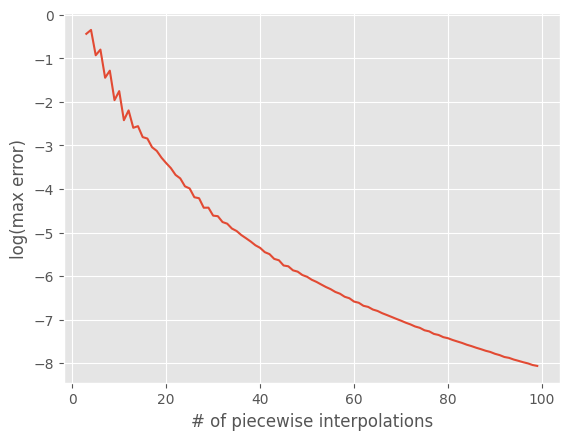

In [64]:
plt.style.use("ggplot")
plt.plot(ns,log_me)
plt.xlabel("# of piecewise interpolations")
plt.ylabel('log(max error)')
plt.show()

Again, we can see a similar result to the previously analyzed function. We see that for both piecewise linear and piecewise quadratic interpolation we have a desirable result- the maximum error decreases as we increase number of piecewise interpolations. Similarly, we can also see that the maximum error of piecewise quadratic interpolation appears to decrease faster than piecewise linear interpolation.